In [1]:
"""example of maximizing generalization using the dropout layer"""

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()

#reverse_word_index reverse get_word_index, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
"""decoded_review decodes the review. the indices are offeset by 3 because 0,1,2 are reserved indices for padding,
staet of sequence and unknown """

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))#creates an  all zeros of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. #sets specific indices of results[i] to 1s
    return results

#vectorize test data and train data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#vectrize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#setting aside the validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#traiming the model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 108ms/step - loss: 0.5377 - accuracy: 0.7726 - val_loss: 0.4687 - val_accuracy: 0.8219
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3365 - accuracy: 0.9015 - val_loss: 0.3249 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2457 - accuracy: 0.9244 - val_loss: 0.2913 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1884 - accuracy: 0.9443 - val_loss: 0.3144 - val_accuracy: 0.8726
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1493 - accuracy: 0.9563 - val_loss: 0.2823 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1233 - accuracy: 0.9643 - val_loss: 0.3042 - val_accuracy: 0.8815
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1038 - accuracy: 0.9691 - val_loss: 0.3117 - val_accuracy: 0.8815
Epoch 8/20
3

In [2]:
"""adding the dropout layer"""

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#setting aside the validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#traiming the model
history_dropout = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 100ms/step - loss: 0.6323 - accuracy: 0.6491 - val_loss: 0.5227 - val_accuracy: 0.8515
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5168 - accuracy: 0.7723 - val_loss: 0.4283 - val_accuracy: 0.8715
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4334 - accuracy: 0.8305 - val_loss: 0.3595 - val_accuracy: 0.8668
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3734 - accuracy: 0.8610 - val_loss: 0.3081 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3174 - accuracy: 0.8872 - val_loss: 0.2842 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2773 - accuracy: 0.9002 - val_loss: 0.2736 - val_accuracy: 0.8902
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2439 - accuracy: 0.9159 - val_loss: 0.2982 - val_accuracy: 0.8833
Epoch 8/20
3

<function matplotlib.pyplot.show(close=None, block=None)>

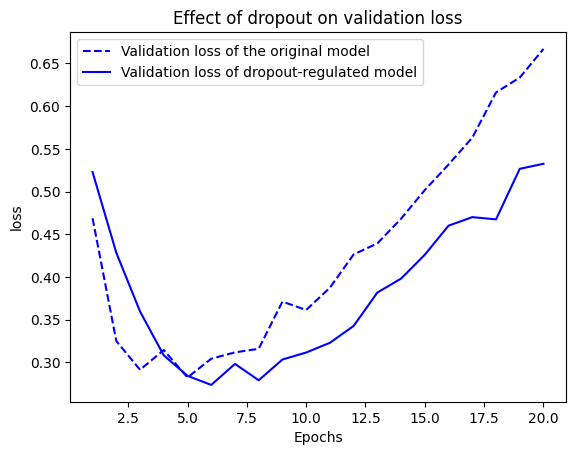

In [5]:
"""Comparing the valiation loss of the original with the validation loss with dropout"""

import matplotlib.pyplot as plt

loss_values = history.history['val_loss']
loss_dropout = history_dropout.history['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b--", label="Validation loss of the original model")
plt.plot(epochs, loss_dropout, 'b', label='Validation loss of dropout-regulated model')
plt.title('Effect of dropout on validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show